<H3 align='center'> Pregunta de investigación </H3>
<hr style="height:2px;border:none"/>

**Integrantes:** \\

**Daniel Peralta**  -  201621053-9 \\
**Philip Guerra**   -  201623003-3


El siguiente trabajo realizado es original y realizado en conformidad con el código de honor de la Universidad.

La distribución del trabajo se realizo de la siguiente manera, Daniel Peralta se encargó de la realización de la pregunta de investigación, mientras que Philip Guerra se encargó de la realización del challenge de kaggle. Si bien nos dividimos el trabajo de la manera antes mencionada, nos complementamos en gran parte del trabajo, en la realización de resultados y conclusiones.

Para este trabajo se ha seleccionado la pregunta de investigación:

**Entrenamiento de CNN**: Aplicar Batch Normalization (BN) después de una convolución pero antes de la función de activación resulta generalmente más eficaz que aplicarlo después de una convolución con función de activación incluida.

Para refutar o demostrar la pregunta de investigación, se han utilizado tres datasets, donde 2 datasets son sintéticos y 1 dataset es real. 

*   El primer dataset sintético utilizado corresponde al MNIST, se compone de imágenes de números manuscritos del 0 al 9, para poder identificar que tipo de número se encuentra en cada imagen. [Link del dataset](https://keras.io/api/datasets/mnist/)

*   El segundo dataset sintético corresponde al CIFAR10, que es ampliamente utilizado para probar nuevos métodos en redes neuronales, este se compone de 50k imágenes de entrenamiento y 10k de imágenes de test en 10 clases. [Link del dataset](https://keras.io/api/datasets/cifar10/)

*   El dataset real utilizado corresponde al Brain Tumor, se compone de imágenes de cerebros, para poder predecir si las personas poseen o no un tumor en el cerebro. [Link del dataset](https://www.kaggle.com/preetviradiya/brian-tumor-dataset)


Este trabajo se ha basado en gran parte de lo realizado en el artículo “***Breaking Batch Normalization for better explainability of Deep Neural Networks through Layer-wise Relevance Propagation***” en el 2020 por las siguientes personas: Mathilde Guillemot, Catherine Heusele, Rodolphe Korichi, Sylvianne Schnebert, Liming Chen.

Toda la información utilizada en este trabajo se encontrará en el siguiente [link](https://usmcl-my.sharepoint.com/:f:/g/personal/philip_guerra_sansano_usm_cl/EnQ2LC44VhdLhzUWw3bhyvwB5smh27gWbnBnEtwQoYTFXA?e=p2WpaN)

# Batch Normalization

Batch normalization o la normalización de lotes, es utilizado comúnmente para mejorar el entrenamiento de redes neuronales profundas, acelerando la fase de aprendizaje y mostrando una mayor precisión. Durante la fase de entrenamiento, batch normalization evita problemas relacionados con back-propagation. Evita la explosión del gradiente y el problema del desvanecimiento del gradiente al mantener los datos en intervalos delimitados. Durante la fase de test, batch normalization se realiza utilizando varianza y media constantes.

En la siguiente imagen se presentan dos configuraciones diferentes de fusionar la capa de normalización con otra capa, en a) se aplica BN después de la activación y en b) se aplica BN antes de la activación. Si bien en la imagen se muestra aplicado a capas completamente conectadas es análogo para capas convolucionales.

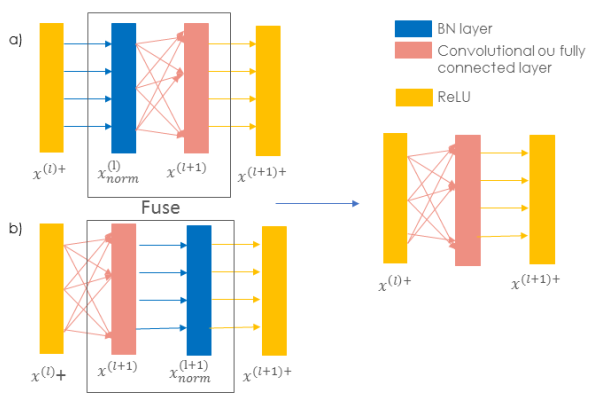

En la siguiente imagen se presenta el esquema de la aplicación de BN antes de una capa convolucional. En una capa convolucional, se aplica la misma normalización a todas las neuronas

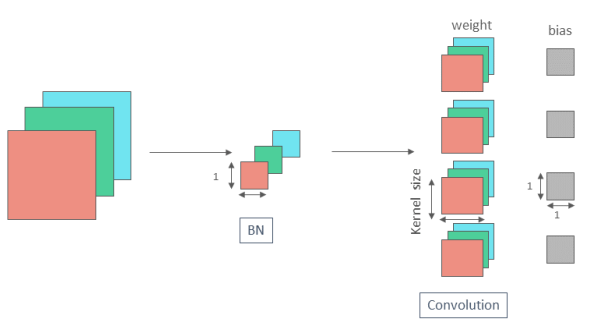

Se realiza la importación de librerías y funciones a utilizar

In [ ]:
#
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston
import matplotlib.gridspec as gridspec


#Para trabajar sobre imagenes
import cv2
import random
import os
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

# Dataset MNIST

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


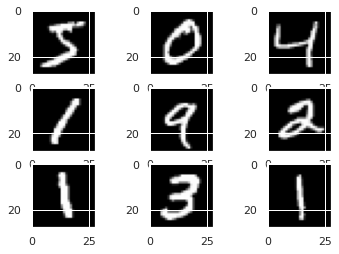

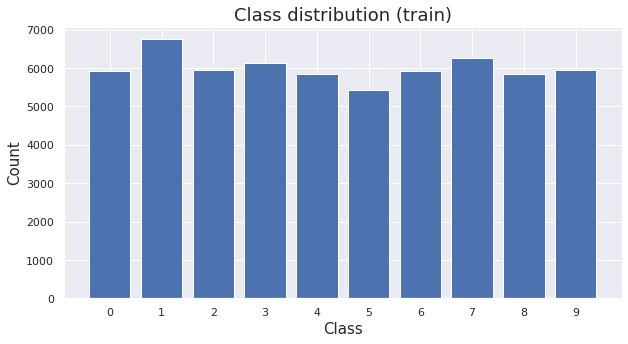

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
targetsShow = y_test
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

#escalamos las imágenes de 0 a 1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


from matplotlib import pyplot
for i in range(9):	
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i][:,:,-1], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# distribucion de ejemplos de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
fig = plt.figure(figsize=(10, 5))
y_pos = np.arange(len(unique))

# Create bars
plt.bar(y_pos, counts)
plt.xticks(y_pos, unique)

plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Class distribution (train)", fontsize=18)
plt.show()




Existe un pequeño desbalance en las distintas clases. Es ideal poder balancear el conjunto de entrenamiento, pero como el próposito del estudio es demostrar el efecto del BN en las capas convoluciones se omitirá este paso.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train , random_state=0)

# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  #aca el reshape
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

#para las etiquetas se usan one-hot
y_train = keras.utils.to_categorical(y_train)
y_val   = keras.utils.to_categorical(y_val)
y_test  = keras.utils.to_categorical(y_test)


In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((48000, 28, 28, 1), (48000, 10), (12000, 28, 28, 1), (12000, 10))

## Arquitecturas de red


Para los tres datasets se compararan tres arquitecturas, donde la primera será sin batch normalization y en las otras dos arquitecturas se aplicará batch normalization, en la primera se aplicará después de una convolución pero antes de la función de activación, y en la última se aplicará después de una convolución con función de activación incluida.

La siguiente figura representa de una forma aproximada como es la arquitectura con aplicación de batch normalization después de la capa convolucional pero antes de la función de activación. Las arquitecturas poseen una profundidad de 7 capas convolucionales.


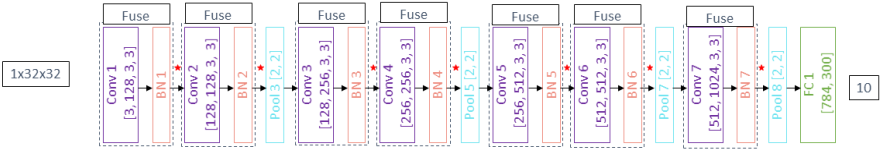



*   Arquitectura 0: Red de 7 capas convolucionales y sin batch normalization.
*   Arquitectura 1: Red de 7 capas convolucionales y con batch normalization aplicada después de la capa convolucional pero antes de la función de activación.
*   Arquitectura 2: Red de 7 capas convolucionales y con batch normalization aplicada después de la capa convolucional pero antes de la función de activación.



### Red sin batch normalization

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import History,EarlyStopping
from keras import backend as K
my_callbacks = [History(), EarlyStopping(patience=5, monitor="val_loss",restore_best_weights=True)]


input_shape = (28,28,1,)

no_classes = 10
model = Sequential()  
tf.random.set_seed(1234)
#1° capa
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same", input_shape=input_shape,name='primera0')) 
#2° capa
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#3° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding="same"))
#4° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding="same",name='cuarta0'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#5° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation='relu', padding="same"))
#6° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#7° capa
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu', padding="same",name='septima0'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

_batch_size = 32
model.compile( loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

#Entrenar modelo
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=30,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_val, y_val),
)
Test = model.evaluate(X_test,y_test)

without_bn_train_accu = history.history['accuracy']
without_bn_val_accu = history.history['val_accuracy']
without_bn_test_accu = Test[1]
without_bn_train_loss = history.history['loss']
without_bn_val_loss = history.history['val_loss']
without_bn_test_loss = Test[0]


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera0 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
cuarta0 (Conv2D)             (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 256)        

Se graficará mapas de calor para 3 capas diferentes, que corresponden a la 1°, 4° y 7° capa convolucional, para poder visualizar que es lo que la red identifica de las imágenes en diferentes capas.

In [ ]:
# Codigo previo para poder gráficar los mapas de calor

import tensorflow.keras.backend as K
#prueba para mapas de calor
def gradCAM(orig, ax, layer_name, model, intensity=0.5, res=250):
  x = orig
  x = np.expand_dims(x, axis=0)
 
  preds = model.predict(x)

  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer(layer_name)
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)[0]
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  img = orig
  heatmap = cv2.resize(heatmap, (img.shape[0], img.shape[1]))

  heatmap = heatmap *255
  
  heatmap = np.clip(heatmap, 0, 255).astype(np.uint8)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  img = heatmap * intensity + img

  ax.imshow(cv2.resize(orig, (res, res)))
  ax.imshow(cv2.resize(img, (res, res)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)

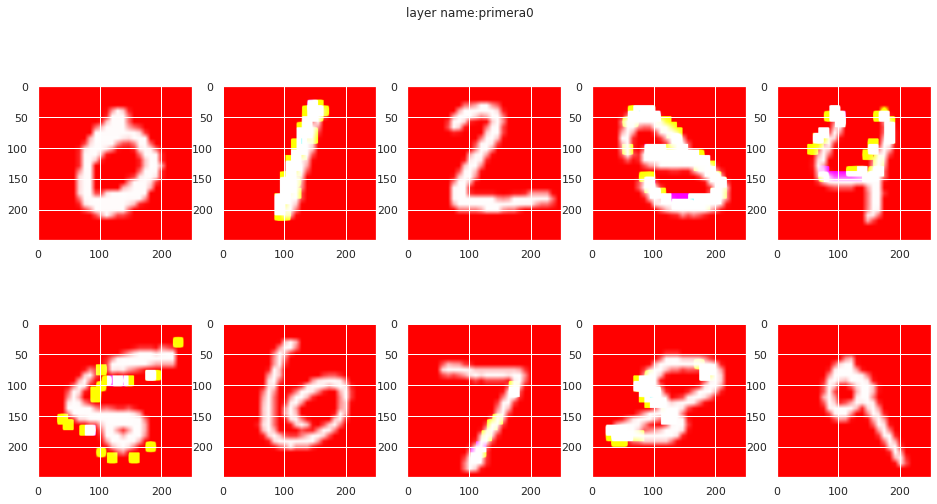

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

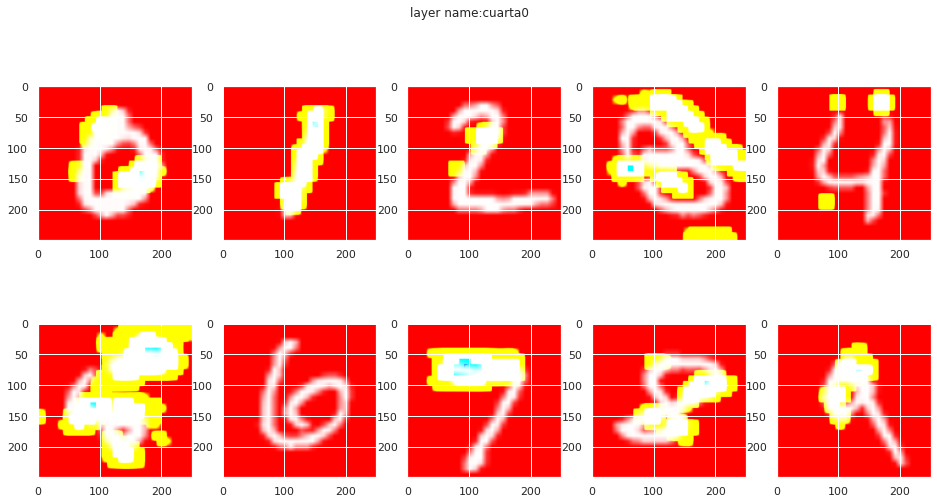

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

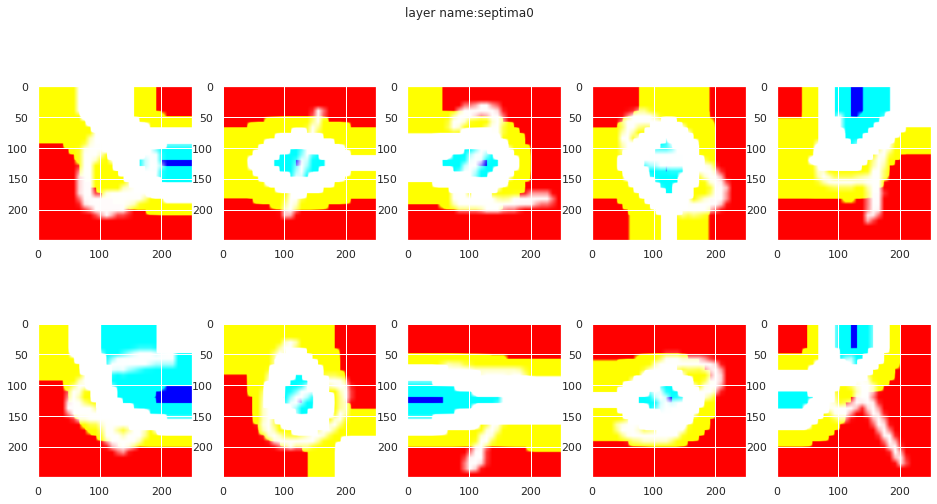

In [ ]:
#Mapas de calor sin BN
layer_name='primera0'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='cuarta0'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='septima0'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

### Red con batch normalization antes de función de activación

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import History,EarlyStopping
from keras import backend as K
my_callbacks = [History(), EarlyStopping(patience=5, monitor="val_loss",restore_best_weights=True)]


input_shape = (28,28,1,)

no_classes = 10
model = Sequential() 
tf.random.set_seed(1234) 
#1° capa
model.add(Conv2D(64, kernel_size=(3, 3), activation=None, padding="same", input_shape=input_shape,name='primera1')) #sin funcion de activacion
model.add(BatchNormalization())  #BN
model.add(Activation('relu'))  #aplicamos la no linealidad despues
#2° capa
model.add(Conv2D(64, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#3° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
#4° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same",name='cuarta1'))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#5° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
#6° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#7° capa
model.add(Conv2D(512, kernel_size=(3, 3),activation=None, padding="same",name='septima1'))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

_batch_size = 32
model.compile( loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

#Entrenar modelo
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=30,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_val, y_val),
)
Test = model.evaluate(X_test,y_test)

with_bn1_train_accu = history.history['accuracy']
with_bn1_val_accu = history.history['val_accuracy']
with_bn1_test_accu = Test[1]
with_bn1_train_loss = history.history['loss']
with_bn1_val_loss = history.history['val_loss']
with_bn1_test_loss = Test[0]


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

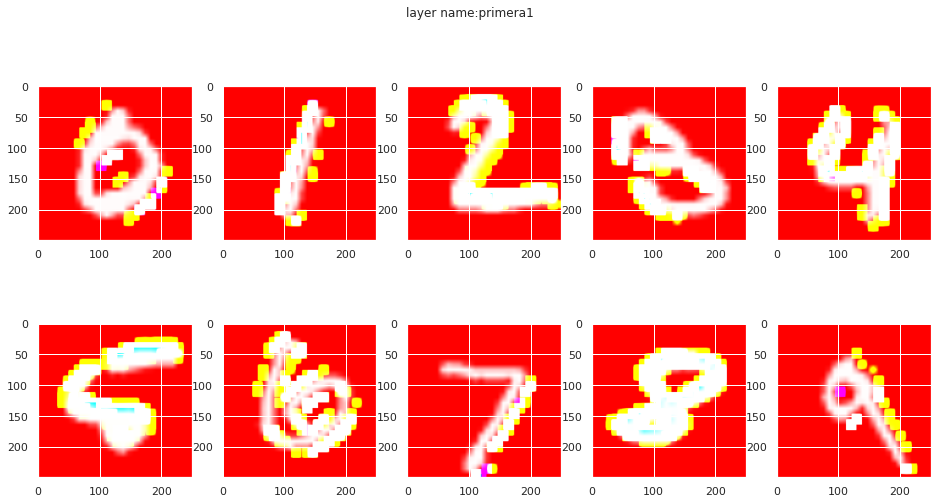

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

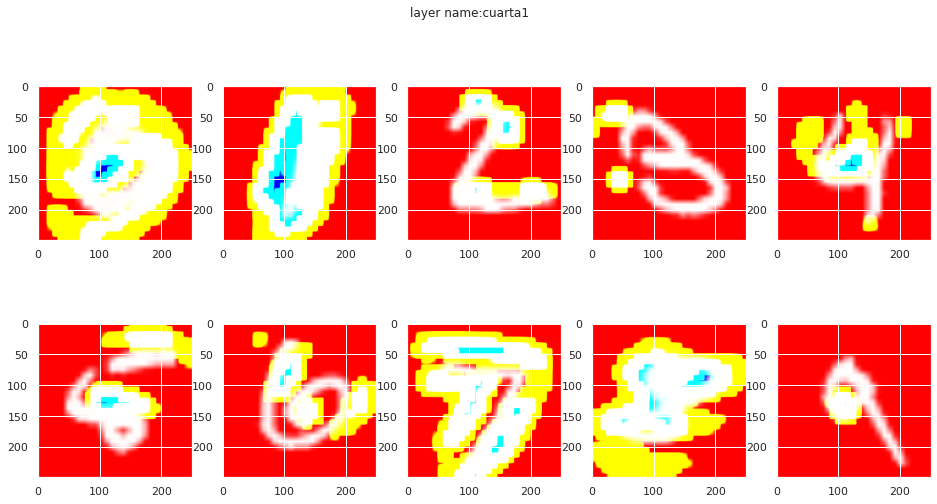

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divid

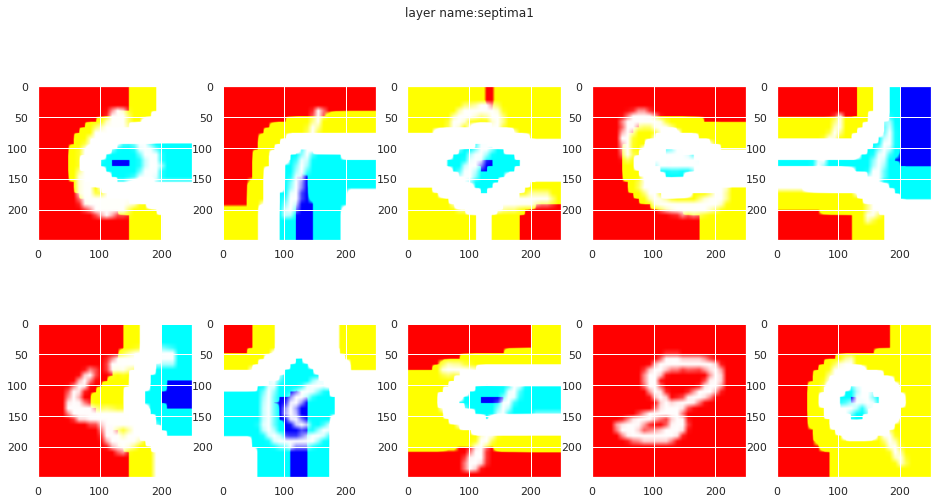

In [ ]:
#Mapa de calor
layer_name='primera1'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='cuarta1'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='septima1'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

### Red con batch normalization después de función de activación

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import History,EarlyStopping
from keras import backend as K
my_callbacks = [History(), EarlyStopping(patience=5, monitor="val_loss",restore_best_weights=True)]

input_shape = (28,28,1,)

no_classes = 10
model = Sequential()  
tf.random.set_seed(1234)
#1° capa
model.add(Conv2D(64, kernel_size=(3, 3), activation=None, padding="same", input_shape=input_shape,name='primera2')) #sin funcion de activacion
model.add(Activation('relu'))  #aplicamos la no linealidad antes
model.add(BatchNormalization())  #BN
#2° capa
model.add(Conv2D(64, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#3° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
#4° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same",name='cuarta2'))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#5° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
#6° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#7° capa
model.add(Conv2D(512, kernel_size=(3, 3),activation=None, padding="same",name='septima2'))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

_batch_size = 32
model.compile( loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

#Entrenar modelo
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=30,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_val, y_val),
)

Test = model.evaluate(X_test,y_test)

with_bn2_train_accu = history.history['accuracy']
with_bn2_val_accu = history.history['val_accuracy']
with_bn2_test_accu = Test[1]
with_bn2_train_loss = history.history['loss']
with_bn2_val_loss = history.history['val_loss']
with_bn2_test_loss = Test[0]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera_2 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

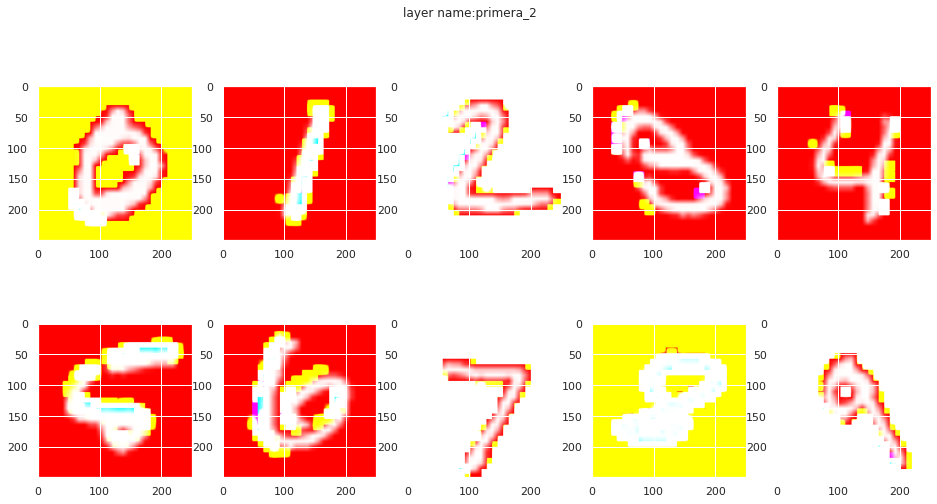

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

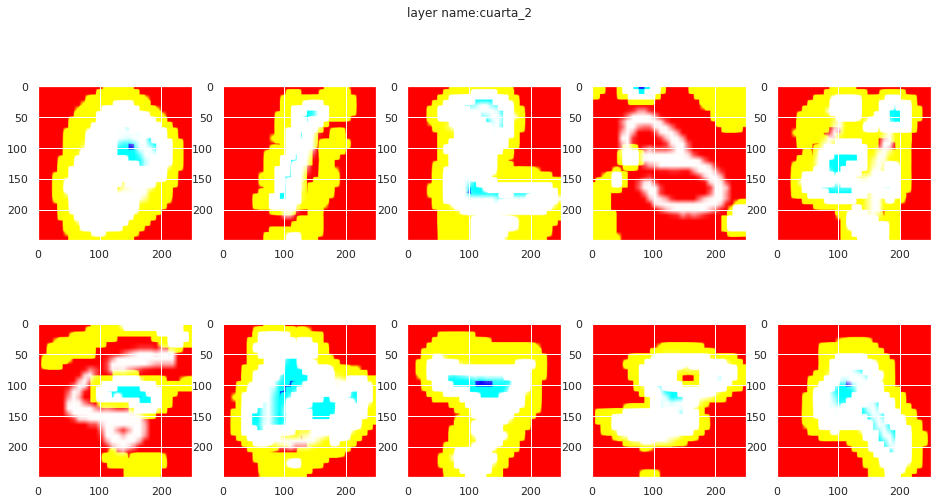

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

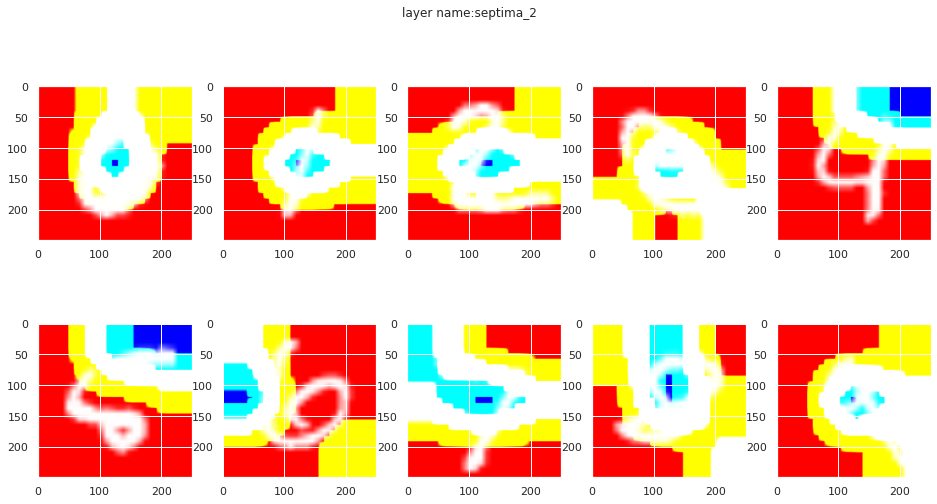

In [ ]:
#Mapa de calor
layer_name='primera2'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='cuarta2'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='septima2'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

## Resultados con dataset MNIST

### Accuracy y loss en los conjuntos de entrenamiento, validación y test

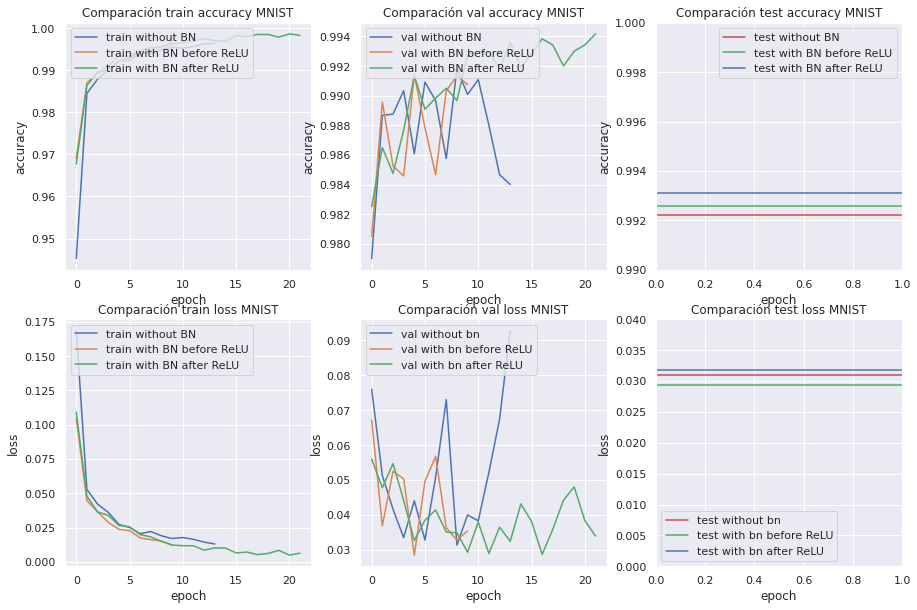

In [ ]:
f, ([ax0, ax1, ax2], [ax3, ax4, ax5]) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

ax0.plot(without_bn_train_accu,label='train without BN')
ax0.plot(with_bn1_train_accu,label='train with BN before ReLU')
ax0.plot(with_bn2_train_accu,label='train with BN after ReLU')
ax0.set_title('Comparación train accuracy MNIST')
ax0.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')

ax1.plot(without_bn_val_accu,label='val without BN')
ax1.plot(with_bn1_val_accu,label='val with BN before ReLU')
ax1.plot(with_bn2_val_accu,label='val with BN after ReLU')
ax1.set_title('Comparación val accuracy MNIST')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper left')

ax2.axhline(without_bn_test_accu,label='test without BN',color='r')
ax2.axhline(with_bn1_test_accu,label='test with BN before ReLU',color='g')
ax2.axhline(with_bn2_test_accu,label='test with BN after ReLU',color='b')
ax2.set_title('Comparación test accuracy MNIST')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(loc='best')
ax2.set_ylim([0.99,1])

ax3.plot(without_bn_train_loss,label='train without BN')
ax3.plot(with_bn1_train_loss,label='train with BN before ReLU')
ax3.plot(with_bn2_train_loss,label='train with BN after ReLU')
ax3.set_title('Comparación train loss MNIST')
ax3.set_ylabel('loss')
ax3.set_xlabel('epoch')
ax3.legend(loc='upper left')

ax4.plot(without_bn_val_loss,label='val without bn')
ax4.plot(with_bn1_val_loss,label='val with bn before ReLU')
ax4.plot(with_bn2_val_loss,label='val with bn after ReLU')
ax4.set_title('Comparación val loss MNIST')
ax4.set_ylabel('loss')
ax4.set_xlabel('epoch')
ax4.legend(loc='upper left')

ax5.axhline(without_bn_test_loss,label='test without bn',color='r')
ax5.axhline(with_bn1_test_loss,label='test with bn before ReLU',color='g')
ax5.axhline(with_bn2_test_loss,label='test with bn after ReLU',color='b')
ax5.set_title('Comparación test loss MNIST')
ax5.set_ylabel('loss')
ax5.set_xlabel('epoch')
ax5.legend(loc='best')
ax5.set_ylim([0,0.04])

plt.show()


 

*   Podemos notar de los gráficos, que el entrenamiento es muy similar en las tres arquitecturas consideradas. 
*   Del conjunto de test se obtiene que, tanto el accuracy como la loss son muy similares para las tres arquitecturas.



### Mapas de calor

De los mapas de calor obtenidos para las tres capas por cada arquitectura, notamos que al utilizar BN, la red parece identificar de mejor manera los contornos de los números a clasificar.

# Dataset CIFAR10

## Procesamiento de datos

Importamos la data y mostramos algunas figuras junto a la distribución de las clases:

Shape X_train + X_val:  (50000, 32, 32, 3)
Shape X_test:  (10000, 32, 32, 3)


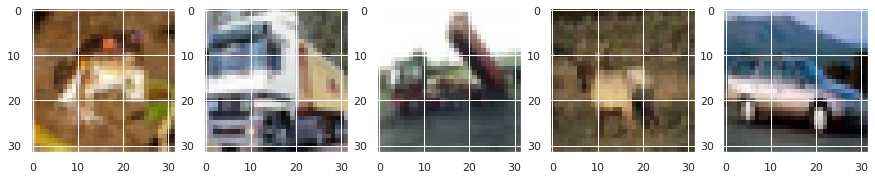

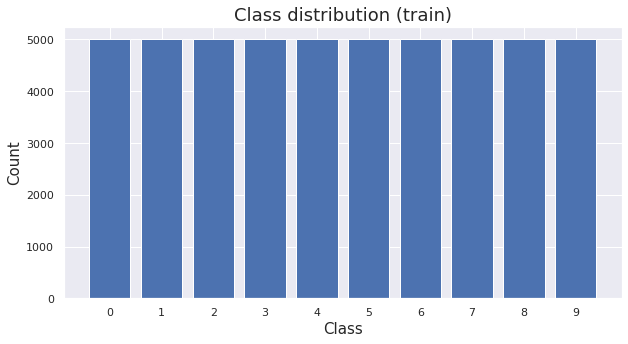

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print("Shape X_train + X_val: ", X_train.shape)
print("Shape X_test: ", X_test.shape)

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


# plot images
fig = plt.figure(figsize=(15, 5))

for i in range(5):    
    ax = fig.add_subplot(1, 5,i+1)
    plt.imshow(X_train[i])

# distribucion de ejemplos de entrenamiento

unique, counts = np.unique(y_train, return_counts=True)

fig = plt.figure(figsize=(10, 5))

y_pos = np.arange(len(unique))

# Create bars
plt.bar(y_pos, counts)

plt.xticks(y_pos, unique)

plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Class distribution (train)", fontsize=18)
plt.show()

El código para cada imagen es el siguiente:
0 : Airplane \\
1 : Automobile \\
2 : Bird \\
3 : Cat \\
4 : Deer \\
5 : Dog \\
6 : Frog \\
7 : Horse \\
8 : Ship \\
9 : Truck \\

In [ ]:
#preparamos la data
#preparamos la data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train , random_state=0)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)  #aca el reshape
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

#para las etiquetas se usan one-hot
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)

## Arquitecturas de red


### Red sin batch normalization

In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import History,EarlyStopping
from keras import backend as K
my_callbacks = [History(), EarlyStopping(patience=5, monitor="val_loss",restore_best_weights=True)]


input_shape = (32,32,3,)

no_classes = 10
model = Sequential() 
tf.random.set_seed(1234) 
#1° capa
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same", input_shape=input_shape,name='primera0')) 
#2° capa
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#3° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding="same"))
#4° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding="same",name='cuarta0'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#5° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation='relu', padding="same"))
#6° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#7° capa
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu', padding="same",name='septima0'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

_batch_size = 32
model.compile( loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

#Entrenar modelo
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=30,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_val, y_val),
)
Test = model.evaluate(X_test,y_test)

without_bn_train_accu = history.history['accuracy']
without_bn_val_accu = history.history['val_accuracy']
without_bn_test_accu = Test[1]
without_bn_train_loss = history.history['loss']
without_bn_val_loss = history.history['val_loss']
without_bn_test_loss = Test[0]


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera0 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
cuarta0 (Conv2D)             (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 256)        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)

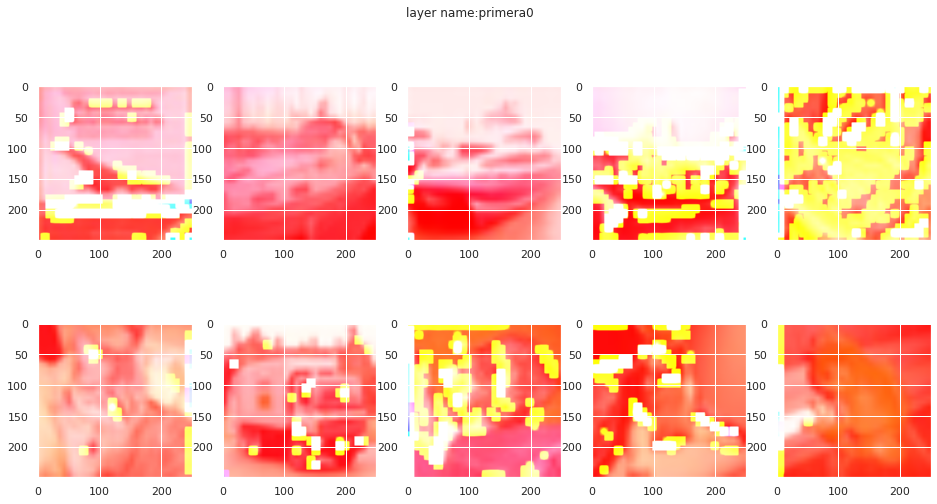

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

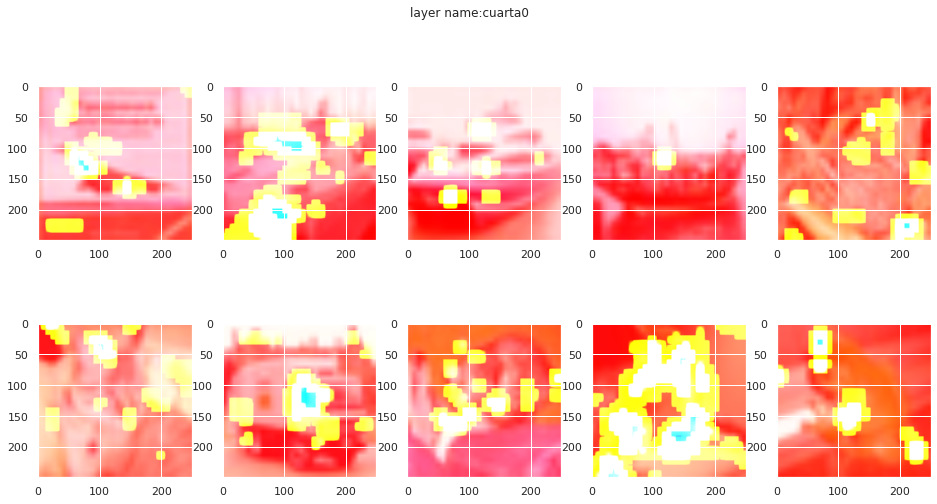

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

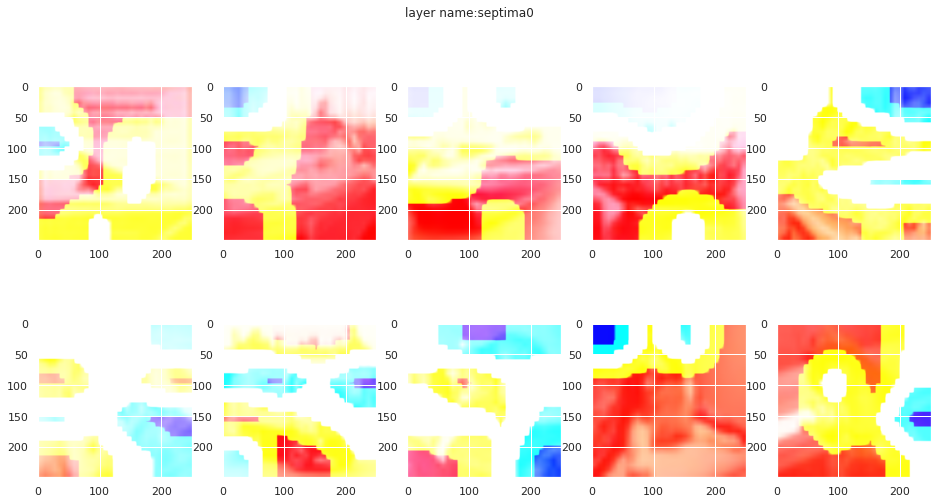

In [ ]:
#Mapas de calor sin BN
layer_name='primera0'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='cuarta0'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='septima0'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

### Red con batch normalization antes de función de activación


In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import History,EarlyStopping
from keras import backend as K
my_callbacks = [History(), EarlyStopping(patience=5, monitor="val_loss",restore_best_weights=True)]


input_shape = (32,32,3,)

no_classes = 10
model = Sequential()  
tf.random.set_seed(1234) 
#1° capa
model.add(Conv2D(64, kernel_size=(3, 3), activation=None, padding="same", input_shape=input_shape,name='primera1')) #sin funcion de activacion
model.add(BatchNormalization())  #BN
model.add(Activation('relu'))  #aplicamos la no linealidad despues
#2° capa
model.add(Conv2D(64, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#3° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
#4° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same",name='cuarta1'))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#5° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
#6° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#7° capa
model.add(Conv2D(512, kernel_size=(3, 3),activation=None, padding="same",name='septima1'))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

_batch_size = 32
model.compile( loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

#Entrenar modelo
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=30,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_val, y_val),
)
Test = model.evaluate(X_test,y_test)

with_bn1_train_accu = history.history['accuracy']
with_bn1_val_accu = history.history['val_accuracy']
with_bn1_test_accu = Test[1]
with_bn1_train_loss = history.history['loss']
with_bn1_val_loss = history.history['val_loss']
with_bn1_test_loss = Test[0]


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 64)      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

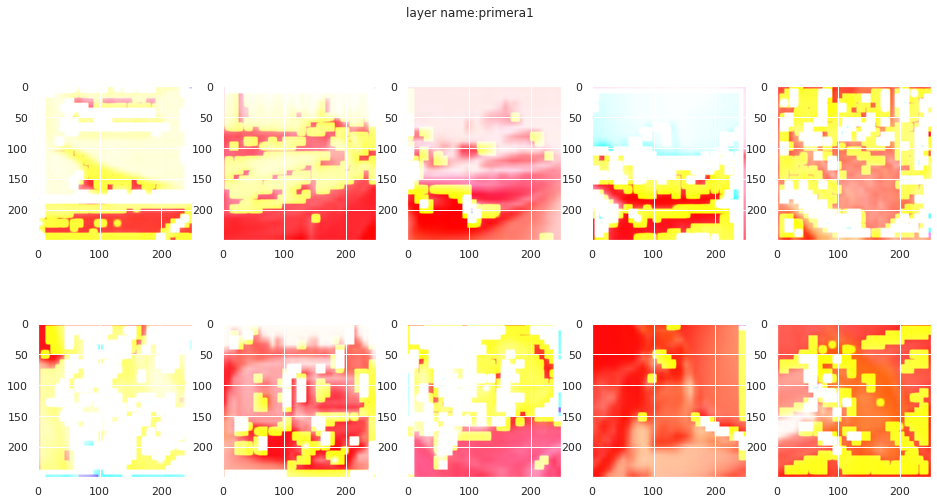

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

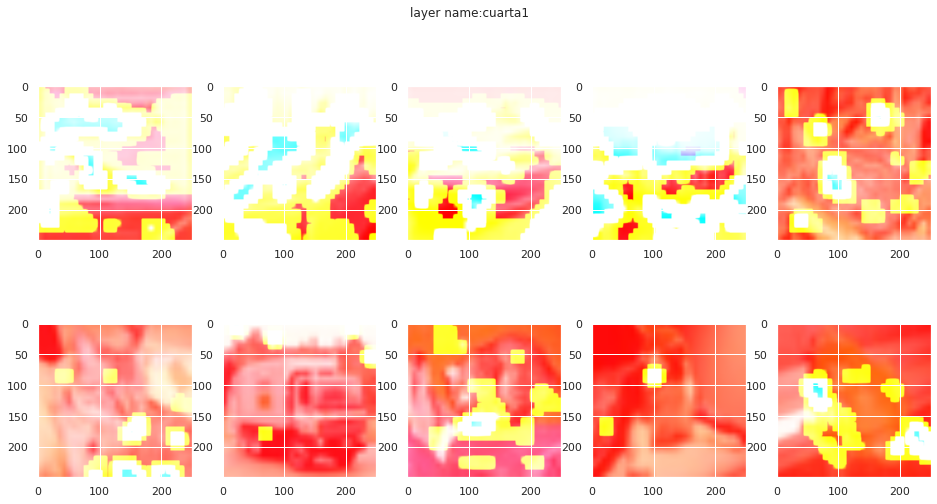

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)

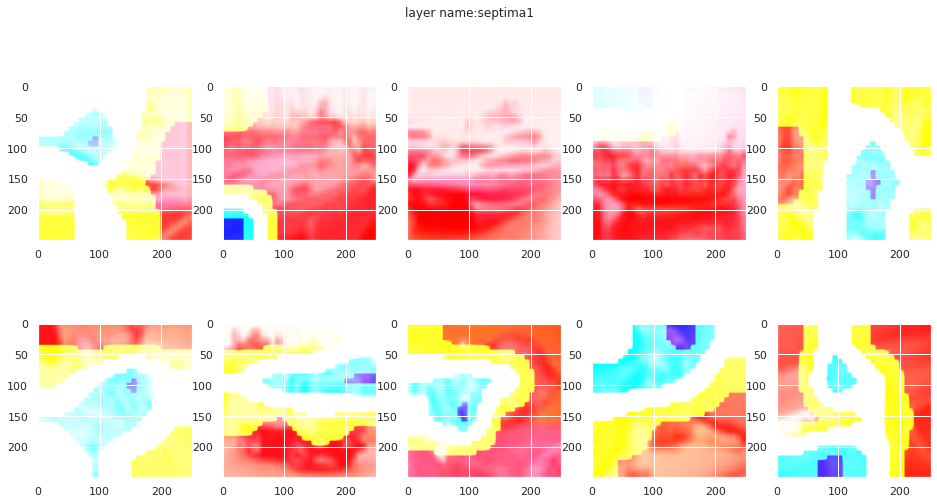

In [ ]:
#Mapa de calor
layer_name='primera1'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='cuarta1'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='septima1'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

### Red con batch normalization después de función de activación

In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import History,EarlyStopping
from keras import backend as K
my_callbacks = [History(), EarlyStopping(patience=5, monitor="val_loss",restore_best_weights=True)]


input_shape = (32,32,3,)

no_classes = 10
model = Sequential()  
tf.random.set_seed(1234) 
#1° capa
model.add(Conv2D(64, kernel_size=(3, 3), activation=None, padding="same", input_shape=input_shape,name='primera2')) #sin funcion de activacion
model.add(Activation('relu'))  #aplicamos la no linealidad antes
model.add(BatchNormalization())  #BN
#2° capa
model.add(Conv2D(64, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#3° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
#4° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same",name='cuarta2'))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#5° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
#6° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#7° capa
model.add(Conv2D(512, kernel_size=(3, 3),activation=None, padding="same",name='septima2'))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

_batch_size = 32
model.compile( loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

#Entrenar modelo
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=30,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_val, y_val),
)

Test = model.evaluate(X_test,y_test)

with_bn2_train_accu = history.history['accuracy']
with_bn2_val_accu = history.history['val_accuracy']
with_bn2_test_accu = Test[1]
with_bn2_train_loss = history.history['loss']
with_bn2_val_loss = history.history['val_loss']
with_bn2_test_loss = Test[0]



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 64)      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

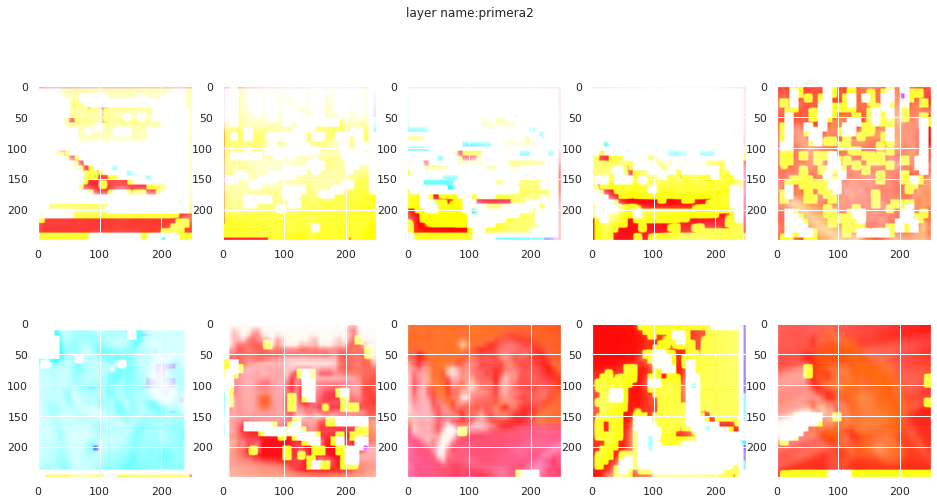

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

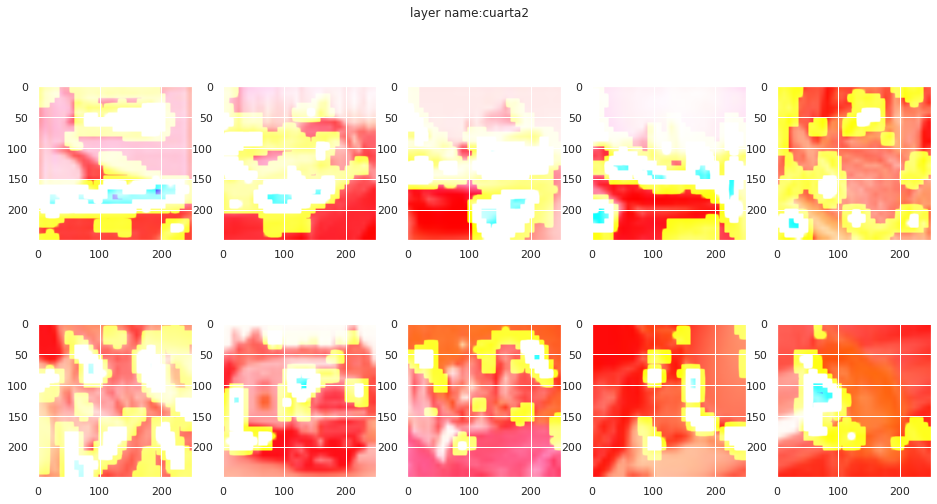

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

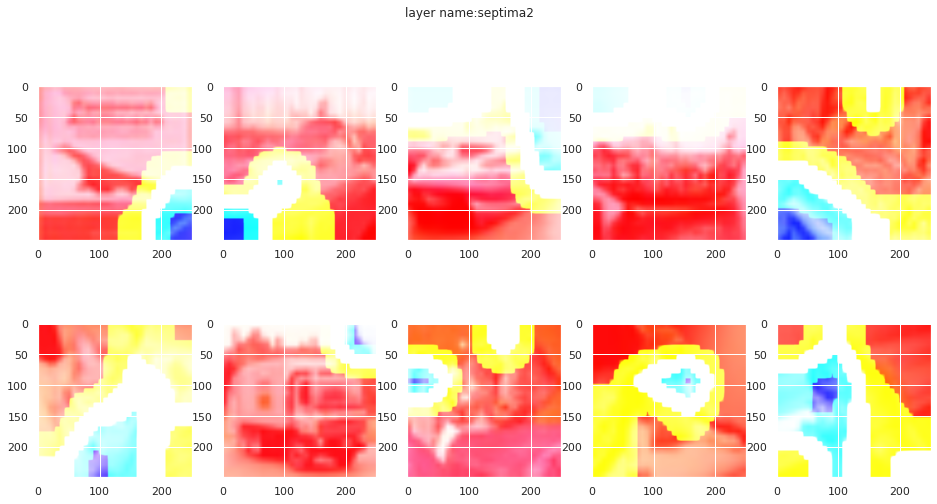

In [ ]:
#Mapa de calor
layer_name='primera2'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='cuarta2'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='septima2'
cont=0
fig, [ax1, ax2] = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(16)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
for k in ax2:
  gradCAM(X_test[np.where(targetsShow==[cont])[0][0]], k, layer_name, model)
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

## Resultados con dataset CIFAR10

### Accuracy y loss en los conjuntos de entrenamiento, validación y test

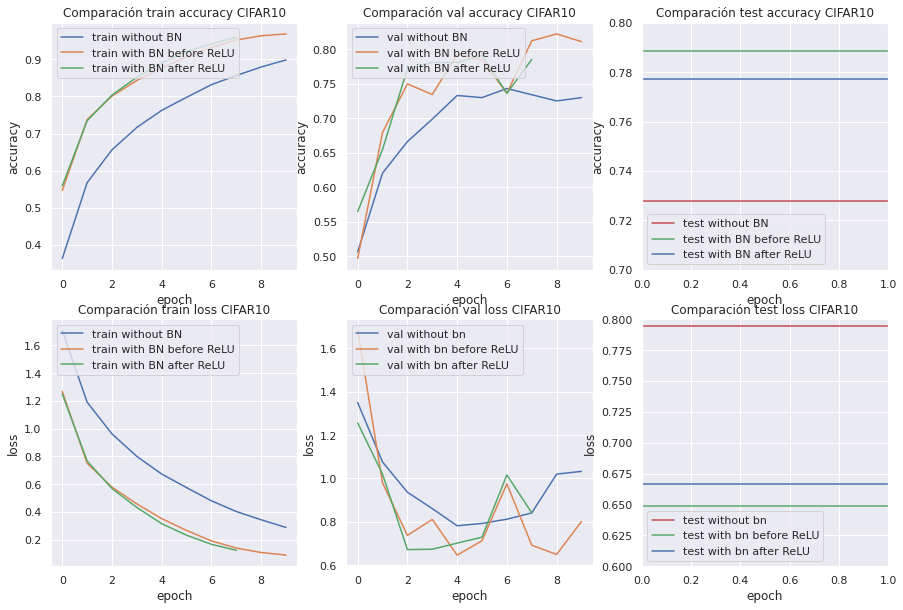

In [ ]:
f, ([ax0, ax1, ax2], [ax3, ax4, ax5]) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

ax0.plot(without_bn_train_accu,label='train without BN')
ax0.plot(with_bn1_train_accu,label='train with BN before ReLU')
ax0.plot(with_bn2_train_accu,label='train with BN after ReLU')
ax0.set_title('Comparación train accuracy CIFAR10')
ax0.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')


ax1.plot(without_bn_val_accu,label='val without BN')
ax1.plot(with_bn1_val_accu,label='val with BN before ReLU')
ax1.plot(with_bn2_val_accu,label='val with BN after ReLU')
ax1.set_title('Comparación val accuracy CIFAR10')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper left')


ax2.axhline(without_bn_test_accu,label='test without BN',color='r')
ax2.axhline(with_bn1_test_accu,label='test with BN before ReLU',color='g')
ax2.axhline(with_bn2_test_accu,label='test with BN after ReLU',color='b')
ax2.set_title('Comparación test accuracy CIFAR10')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(loc='best')
ax2.set_ylim([0.7,0.8])

ax3.plot(without_bn_train_loss,label='train without BN')
ax3.plot(with_bn1_train_loss,label='train with BN before ReLU')
ax3.plot(with_bn2_train_loss,label='train with BN after ReLU')
ax3.set_title('Comparación train loss CIFAR10')
ax3.set_ylabel('loss')
ax3.set_xlabel('epoch')
ax3.legend(loc='upper left')


ax4.plot(without_bn_val_loss,label='val without bn')
ax4.plot(with_bn1_val_loss,label='val with bn before ReLU')
ax4.plot(with_bn2_val_loss,label='val with bn after ReLU')
ax4.set_title('Comparación val loss CIFAR10')
ax4.set_ylabel('loss')
ax4.set_xlabel('epoch')
ax4.legend(loc='upper left')


ax5.axhline(without_bn_test_loss,label='test without bn',color='r')
ax5.axhline(with_bn1_test_loss,label='test with bn before ReLU',color='g')
ax5.axhline(with_bn2_test_loss,label='test with bn after ReLU',color='b')
ax5.set_title('Comparación test loss CIFAR10')
ax5.set_ylabel('loss')
ax5.set_xlabel('epoch')
ax5.legend(loc='best')
ax5.set_ylim([0.6,0.8])

plt.show()




*   Para este dataset, se observa una mayor diferencia en el entrenamiento al ocupar una arquitectura de red sin BN y con BN, donde se obtienen mejores resultados al incluir BN, independiente de si la aplicación de este es antes o después de la función de activación.
*   Luego, para el conjunto de test se obtuvo una diferencia respecto a la red sin BN y las redes con BN, donde los mejores resultados obtenidos fueron aplicando BN despúes de la capa convolucional pero antes de la función de activación.



### Mapas de calor

Al igual que con el dataset MNIST, se observa que las arquitecturas que poseen BN reconocen de mejor forma los contornos de las imágenes, y entre las dos formas de aplicar BN, se aprecia de mejor forma en los mapas de calor de la capa 4 que, se reconoce mejor los contornos de las imágenes cuando se aplica BN después de la función de activación.

Mapa de calor de la capa 4 de la red con BN aplicado antes de la función de activación.

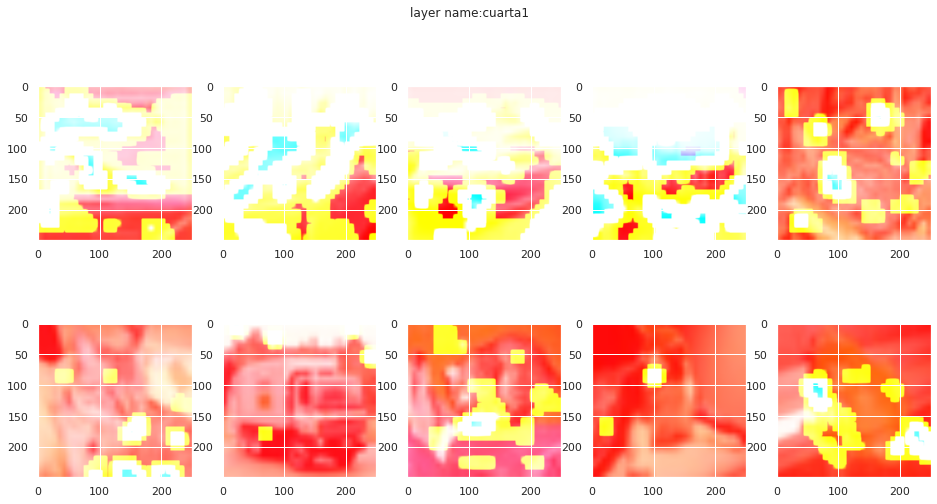

Mapa de calor de la capa 4 de la red con BN aplicado después de la función de activación.

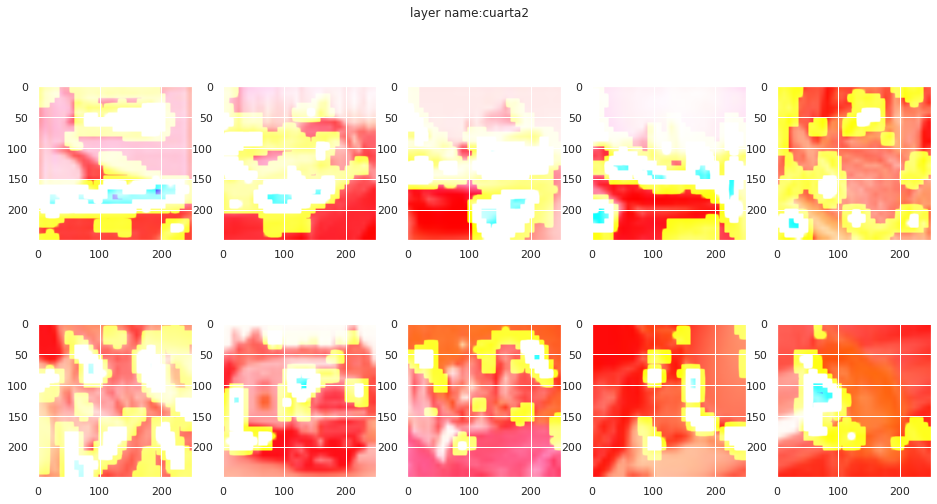

# Dataset Brain Tumor

In [ ]:
#montamos Google Drive

from google.colab import drive

colab_flag = True

if (colab_flag):
    drive.mount('/content/drive')

#path = '/content/drive/MyDrive/2021-1/Redes_neuronales_artificiales/Tarea1/Guerra'
path = '/content/drive/MyDrive/2021-1/ANN/Tarea 1'

Mounted at /content/drive


Se muestran imágenes al azar:

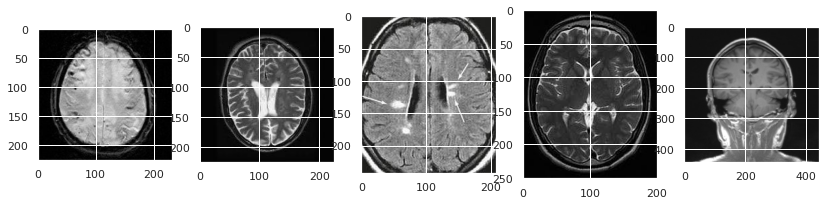

In [ ]:
img_folder = path+'/Brain-Images'
fig = plt.figure(figsize=(14, 10))
#image_path = '/content/drive/MyDrive/2021-1/Redes_neuronales_artificiales/Tarea1/Guerra/brain_images2'

# revisar algunas imágenes
for i in range(5):

    file = os.listdir(img_folder)[i+20] 

    image_path= os.path.join(img_folder, file)
    
    img= mpimg.imread(image_path)
    
    ax = fig.add_subplot(1, 5,i+1)
    
    plt.imshow(img)



Se lee la data:

In [ ]:
data_brain = pd.read_csv(path + '/metadata.csv' ,header=0,engine='python')
print(data_brain.shape)
data_brain.head()

(4600, 6)


Unnamed: 0            image  class format mode          shape
0           0   Cancer (1).jpg  tumor   JPEG  RGB  (512, 512, 3)
1           1   Cancer (1).png  tumor    PNG    L     (300, 240)
2           2   Cancer (1).tif  tumor   TIFF  RGB  (256, 256, 3)
3           3  Cancer (10).jpg  tumor   JPEG  RGB  (512, 512, 3)
4           4  Cancer (10).tif  tumor   TIFF  RGB  (256, 256, 3)

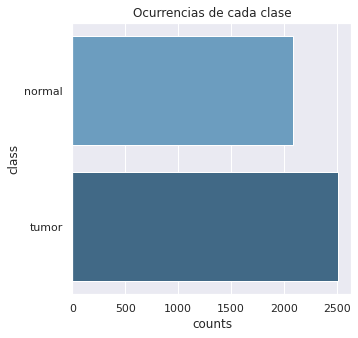

In [ ]:
#distribucion de clases
kd = data_brain.groupby(['class']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(5,5),nrows=1)
sns.barplot(data=kd, y='class', x='counts', palette="Blues_d",ax=ax)
ax.set_title('Ocurrencias de cada clase')
plt.show()

In [ ]:
#cargar las imagenes
img_folder = path+'/Brain-Images'
#img_folder = path+'/brain_images'
def process_dataset(img_folder, width, height):
    data = []
    ids = []
   
    for filename in os.listdir(img_folder):
        
        
        image_path = os.path.join(img_folder, filename)
        image = cv2.imread( image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # ahora trabajamos con imágenes RGB

        # hacemos un resize del tamaño de las imágenes antes de ingresarlo a nuestro modelo
        image = cv2.resize(image, (width, height)) # por ejemplo, 52 x 52 x 3 (3 canales => rojo, verde y azul)
        image = np.array(image)
        image = image.astype('float32')
        image /= 255 # escalar a [0, 1] 


        # obtener la clase correspondiente en los datos del csv usando la id de la imagen
        c = data_brain.loc[data_brain['image'] == filename]['class'].values[0]
                 
        data.append([c, image])

        ids.append(filename)
    
    return np.array(data), np.array(ids)

#img_folder = 'new_images_bee_wasp'

# img_data -> class, image
img_data,  ids = process_dataset(img_folder, 32, 32)

print(img_data[0][1].shape)

(32, 32, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


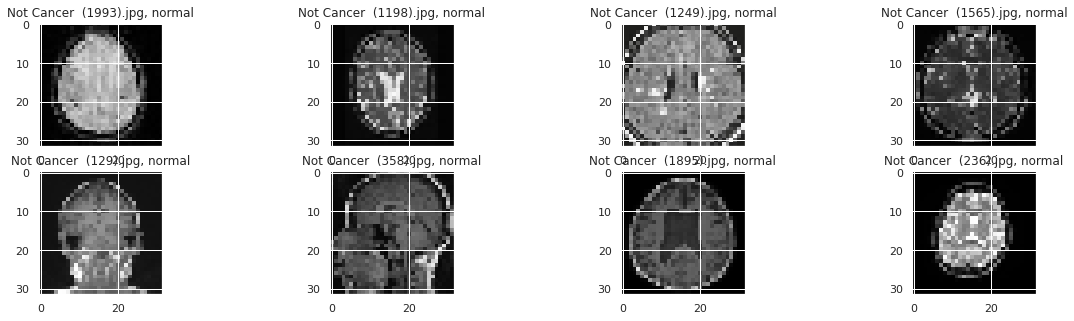

In [ ]:
fig = plt.figure(figsize=(20, 5))

for i in range(8):
    img = Image.fromarray(np.uint8(img_data[i+20][1] * 255))
    
    ax = fig.add_subplot(2, 4, i+1)
    ax.title.set_text(ids[i] + ', ' + img_data[i+20][0] )

    plt.imshow(img, interpolation='none')

Preparamos la data para el entrenamiento:

In [ ]:
n_classes = 2

X = np.array(img_data[:, 1].tolist())

# codificación one-hot para etiquetas 
Y =  pd.get_dummies(img_data[:, 0])

# split en train, val y test
_validation_split = 0.2

# Split de los ejemplos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=_validation_split, random_state=0)
targetsShow = y_test

print("X,y Shapes:", X.shape, Y.shape)
print("X,y Train Shapes:", X_train.shape, y_train.shape)
print("X,y Val Shapes:", X_val.shape, y_val.shape)
print("X,y Test Shapes:", X_test.shape, y_test.shape)

X,y Shapes: (4600, 32, 32, 3) (4600, 2)
X,y Train Shapes: (2944, 32, 32, 3) (2944, 2)
X,y Val Shapes: (736, 32, 32, 3) (736, 2)
X,y Test Shapes: (920, 32, 32, 3) (920, 2)


## Arquitecturas de red

### Red sin batch normalization

In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import History,EarlyStopping
from keras import backend as K
my_callbacks = [History(), EarlyStopping(patience=5, monitor="val_loss",restore_best_weights=True)]


input_shape = (32,32,3,)

no_classes = 2
model = Sequential() 
tf.random.set_seed(1234) 
#1° capa
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same", input_shape=input_shape,name='primera0')) 
#2° capa
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#3° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding="same"))
#4° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu', padding="same",name='cuarta0'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#5° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation='relu', padding="same"))
#6° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
#7° capa
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu', padding="same",name='septima0'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

_batch_size = 32
model.compile( loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

#Entrenar modelo
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=30,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_val, y_val),
)
Test = model.evaluate(X_test,y_test)

without_bn_train_accu = history.history['accuracy']
without_bn_val_accu = history.history['val_accuracy']
without_bn_test_accu = Test[1]
without_bn_train_loss = history.history['loss']
without_bn_val_loss = history.history['val_loss']
without_bn_test_loss = Test[0]



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera0 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
cuarta0 (Conv2D)             (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 256)        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


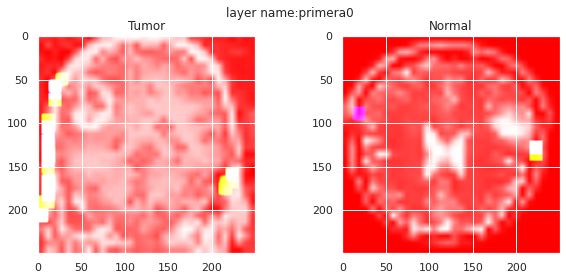

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


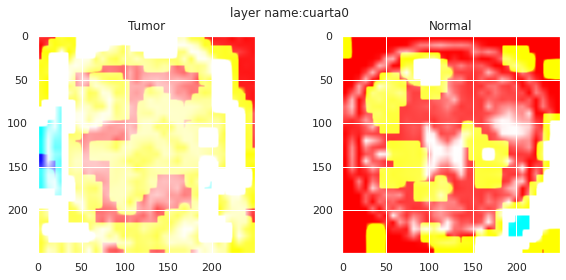

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


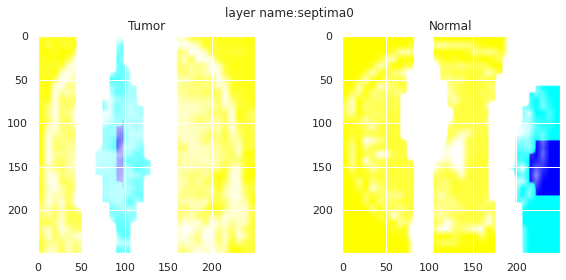

In [ ]:
#Mapa de calor
layer_name='primera0'
cont=0
fig, ax1 = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow.normal.to_numpy()==[cont])[0][1]], k, layer_name, model)
  k.set_title(['Tumor','Normal'][cont])
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='cuarta0'
cont=0
fig, ax1 = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow.normal.to_numpy()==[cont])[0][1]], k, layer_name, model)
  k.set_title(['Tumor','Normal'][cont])
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='septima0'
cont=0
fig, ax1 = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow.normal.to_numpy()==[cont])[0][1]], k, layer_name, model)
  k.set_title(['Tumor','Normal'][cont])
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

### Red con batch normalization antes de función de activación

In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import History,EarlyStopping
from keras import backend as K
my_callbacks = [History(), EarlyStopping(patience=5, monitor="val_loss",restore_best_weights=True)]


input_shape = (32,32,3,)

no_classes = 2
model = Sequential()  
tf.random.set_seed(1234) 
#1° capa
model.add(Conv2D(64, kernel_size=(3, 3), activation=None, padding="same", input_shape=input_shape,name='primera1')) #sin funcion de activacion
model.add(BatchNormalization())  #BN
model.add(Activation('relu'))  #aplicamos la no linealidad despues
#2° capa
model.add(Conv2D(64, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#3° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
#4° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same",name='cuarta1'))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#5° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
#6° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
#7° capa
model.add(Conv2D(512, kernel_size=(3, 3),activation=None, padding="same",name='septima1'))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

_batch_size = 32
model.compile( loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

#Entrenar modelo
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=30,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_val, y_val),
)
Test = model.evaluate(X_test,y_test)

with_bn1_train_accu = history.history['accuracy']
with_bn1_val_accu = history.history['val_accuracy']
with_bn1_test_accu = Test[1]
with_bn1_train_loss = history.history['loss']
with_bn1_val_loss = history.history['val_loss']
with_bn1_test_loss = Test[0]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


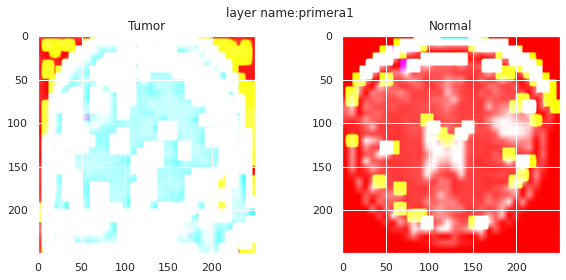

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


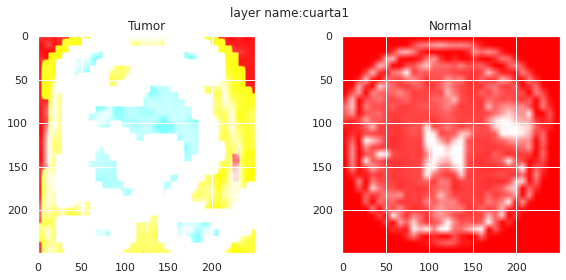

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


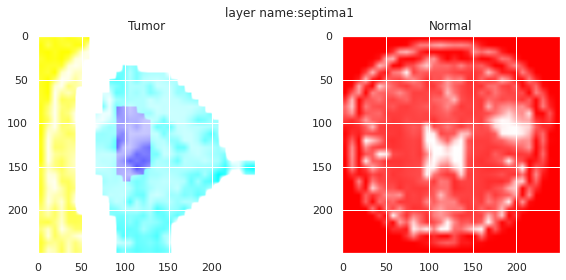

In [ ]:
#Mapa de calor
layer_name='primera1'
cont=0
fig, ax1 = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow.normal.to_numpy()==[cont])[0][1]], k, layer_name, model)
  k.set_title(['Tumor','Normal'][cont])
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='cuarta1'
cont=0
fig, ax1 = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow.normal.to_numpy()==[cont])[0][1]], k, layer_name, model)
  k.set_title(['Tumor','Normal'][cont])
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='septima1'
cont=0
fig, ax1 = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow.normal.to_numpy()==[cont])[0][1]], k, layer_name, model)
  k.set_title(['Tumor','Normal'][cont])
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

### Red con batch normalization después de función de activación

In [ ]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import History,EarlyStopping
from keras import backend as K
my_callbacks = [History(), EarlyStopping(patience=5, monitor="val_loss",restore_best_weights=True)]


input_shape = (32,32,3,)

no_classes = 2
model = Sequential()  
tf.random.set_seed(1234) 
#1° capa
model.add(Conv2D(64, kernel_size=(3, 3), activation=None, padding="same", input_shape=input_shape,name='primera2')) #sin funcion de activacion
model.add(Activation('relu'))  #aplicamos la no linealidad antes
model.add(BatchNormalization())  #BN
#2° capa
model.add(Conv2D(64, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#3° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
#4° capa
model.add(Conv2D(128, kernel_size=(3, 3),activation=None, padding="same",name='cuarta2'))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#5° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
#6° capa
model.add(Conv2D(256, kernel_size=(3, 3),activation=None, padding="same"))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#7° capa
model.add(Conv2D(512, kernel_size=(3, 3),activation=None, padding="same",name='septima2'))
model.add(Activation('relu'))  
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

_batch_size = 32
model.compile( loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()

keras.utils.plot_model(model, show_shapes=True)

#Entrenar modelo
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size=_batch_size,
    epochs=30,
    verbose=1,
    callbacks=my_callbacks,
    validation_data=(X_val, y_val),
)

Test = model.evaluate(X_test,y_test)

with_bn2_train_accu = history.history['accuracy']
with_bn2_val_accu = history.history['val_accuracy']
with_bn2_test_accu = Test[1]
with_bn2_train_loss = history.history['loss']
with_bn2_val_loss = history.history['val_loss']
with_bn2_test_loss = Test[0]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
primera2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 64)       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


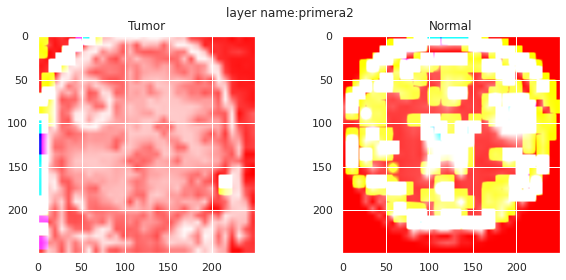

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


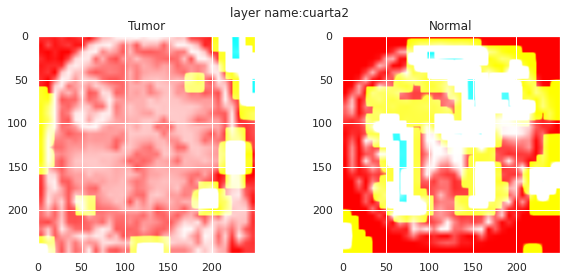

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


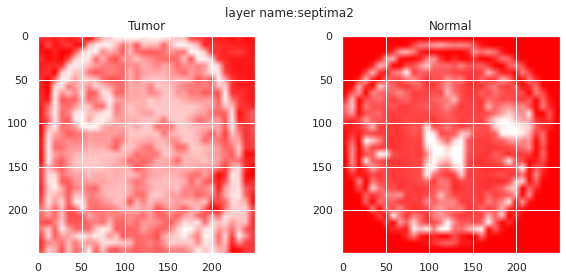

In [ ]:
#Mapa de calor
layer_name='primera2'
cont=0
fig, ax1 = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow.normal.to_numpy()==[cont])[0][1]], k, layer_name, model)
  k.set_title(['Tumor','Normal'][cont])
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='cuarta2'
cont=0
fig, ax1 = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow.normal.to_numpy()==[cont])[0][1]], k, layer_name, model)
  k.set_title(['Tumor','Normal'][cont])
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

#Mapa de calor
layer_name='septima2'
cont=0
fig, ax1 = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(10)
for k in ax1:
  gradCAM(X_test[np.where(targetsShow.normal.to_numpy()==[cont])[0][1]], k, layer_name, model)
  k.set_title(['Tumor','Normal'][cont])
  cont+=1
fig.suptitle('layer name:'+layer_name)
plt.show()

## Resultados con dataset Brain Tumor

### Accuracy y loss en los conjuntos de entrenamiento, validación y test

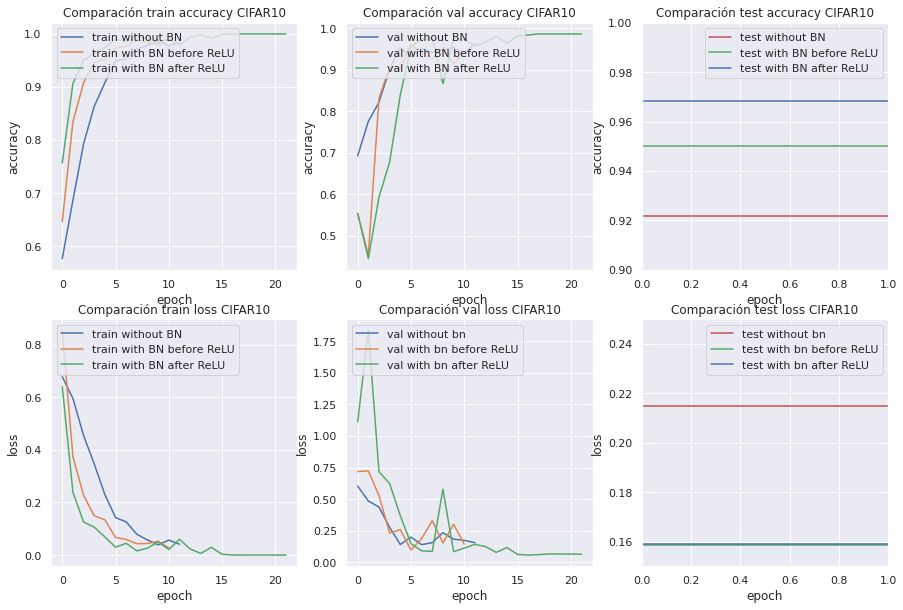

In [ ]:
f, ([ax0, ax1, ax2], [ax3, ax4, ax5]) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

ax0.plot(without_bn_train_accu,label='train without BN')
ax0.plot(with_bn1_train_accu,label='train with BN before ReLU')
ax0.plot(with_bn2_train_accu,label='train with BN after ReLU')
ax0.set_title('Comparación train accuracy CIFAR10')
ax0.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper left')

ax1.plot(without_bn_val_accu,label='val without BN')
ax1.plot(with_bn1_val_accu,label='val with BN before ReLU')
ax1.plot(with_bn2_val_accu,label='val with BN after ReLU')
ax1.set_title('Comparación val accuracy CIFAR10')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper left')

ax2.axhline(without_bn_test_accu,label='test without BN',color='r')
ax2.axhline(with_bn1_test_accu,label='test with BN before ReLU',color='g')
ax2.axhline(with_bn2_test_accu,label='test with BN after ReLU',color='b')
ax2.set_title('Comparación test accuracy CIFAR10')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(loc='best')
ax2.set_ylim([0.9,1])

ax3.plot(without_bn_train_loss,label='train without BN')
ax3.plot(with_bn1_train_loss,label='train with BN before ReLU')
ax3.plot(with_bn2_train_loss,label='train with BN after ReLU')
ax3.set_title('Comparación train loss CIFAR10')
ax3.set_ylabel('loss')
ax3.set_xlabel('epoch')
ax3.legend(loc='upper left')

ax4.plot(without_bn_val_loss,label='val without bn')
ax4.plot(with_bn1_val_loss,label='val with bn before ReLU')
ax4.plot(with_bn2_val_loss,label='val with bn after ReLU')
ax4.set_title('Comparación val loss CIFAR10')
ax4.set_ylabel('loss')
ax4.set_xlabel('epoch')
ax4.legend(loc='upper left')

ax5.axhline(without_bn_test_loss,label='test without bn',color='r')
ax5.axhline(with_bn1_test_loss,label='test with bn before ReLU',color='g')
ax5.axhline(with_bn2_test_loss,label='test with bn after ReLU',color='b')
ax5.set_title('Comparación test loss CIFAR10')
ax5.set_ylabel('loss')
ax5.set_xlabel('epoch')
ax5.legend(loc='best')
ax5.set_ylim([0.15,0.25])

plt.show()

### Mapa de calor

En base a los resultados del mapa de calor, en la red donde se aplica BN antes de la función de activación, se aprecia que la red se activa fuertemente en las imágenes que poseen tumor, por lo que se puede concluir que busca identificar un tumor en el cerebro.

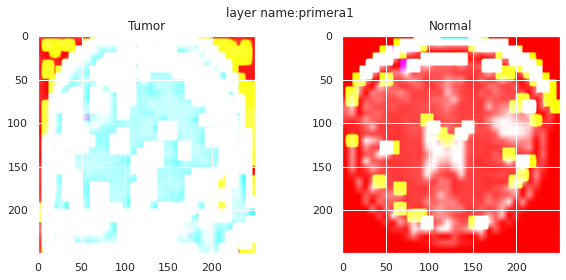

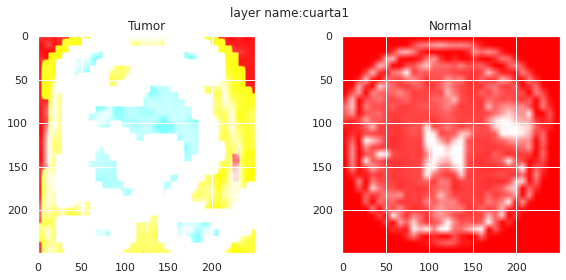

A diferencia de la red donde se aplica BN antes de la función de activación, en la red donde se aplica BN despúes de la función de activación, se aprecia que la red se activa en las imágenes que no poseen tumor, por lo que se concluye que busca identificar las zonas sanas en el cerebro.

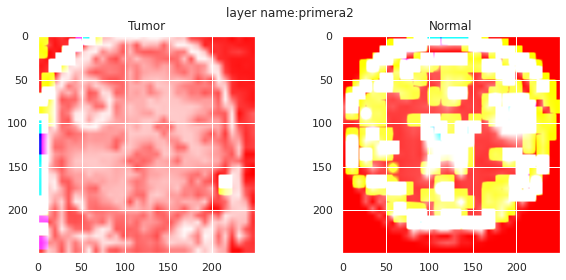

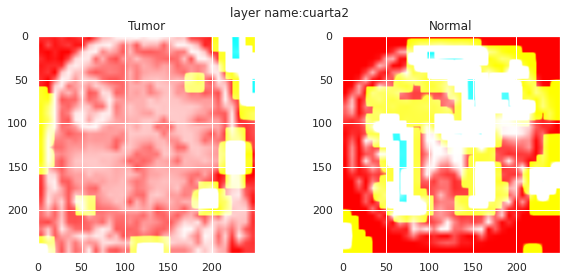

# Conclusiones

Dado los diferentes resultados obtenidos para los tres datasets utilizados, se puede concluir que para datasets menos complejos, como lo son MNIST y Brain Tumor, no se aprecia gran diferencia en la aplicación de BN y de si se aplica esta antes o después de la función de activación, pero en dataset que ya son más complejos como lo es CIFAR10, se puede notar mayor diferenciación al aplicar o no BN, donde se obtienen mejores resultados al aplicar BN, en específico al aplicarlo despúes de la capa convolucional pero antes de la función de activación.

De los mapas de calor, se puede concluir que dependiendo de donde se aplique BN, la red se activará de diferente forma para poder identificar zonas, colores o cosas relevantes de las imagenes y así poder clasificarlas.